Data Handling: pandas, scikit-learn functions.

Model Building: Keras/TensorFlow classes and layers.

Data Augmentation and Preprocessing: ImageDataGenerator.

Evaluation and Visualization: confusion_matrix, seaborn, matplotlib.

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

The create_dataframe_from_images function is a utility to generate a DataFrame that associates image file paths with their corresponding class labels. This DataFrame is useful for training machine learning models and data analysis, especially when dealing with image datasets organized in a directory structure

In [2]:

def create_dataframe_from_images(dataset_path):
    data = []
    
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        
        if not os.path.isdir(class_path):
            continue
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            data.append({'image_path': img_path, 'label': class_name})
    
    df = pd.DataFrame(data)
    return df

The create_dataframe_from_images function is designed to facilitate the organization of image data into a DataFrame, where images are stored in a directory structure by class. This DataFrame is useful for machine learning tasks, allowing easy access to image file paths and their labels for training models.

In [3]:

dataset_path = 'data/'


df = create_dataframe_from_images(dataset_path)


def clean_dataframe(df):
    null_counts = df.isnull().sum()
    print("Null values in each column:\n", null_counts)
    
    df_cleaned = df.dropna()
    
    duplicates_count = df_cleaned.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates_count}")
    
    df_cleaned = df_cleaned.drop_duplicates()
    
    return df_cleaned

The clean_dataframe function helps preprocess the DataFrame by removing rows with missing values and eliminating duplicate entries. This ensures that the data used for further processing or modeling is clean and free from inconsistencies.


In [4]:
df.head(10)

,image_path,label
0,data/cloudy\train_10021.jpg,cloudy
1,data/cloudy\train_10043.jpg,cloudy
2,data/cloudy\train_10070.jpg,cloudy
3,data/cloudy\train_10081.jpg,cloudy
4,data/cloudy\train_10096.jpg,cloudy
5,data/cloudy\train_101.jpg,cloudy
6,data/cloudy\train_10128.jpg,cloudy
7,data/cloudy\train_10166.jpg,cloudy
8,data/cloudy\train_10173.jpg,cloudy
9,data/cloudy\train_10177.jpg,cloudy


In [5]:

df_cleaned = clean_dataframe(df)
print("Shape of the cleaned DataFrame:", df_cleaned.shape)


train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned['label'])


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    vertical_flip=True,
    fill_mode='nearest'
)

Null values in each column:
 image_path    0
label         0
dtype: int64
Number of duplicate rows: 0
Shape of the cleaned DataFrame: (5592, 2)


Data Cleaning:

Cleans the DataFrame by removing null values and duplicates. Prints the shape of the cleaned DataFrame to verify the size.

Data Splitting:

Splits the cleaned DataFrame into training and test sets, ensuring that class proportions are preserved.

Data Augmentation:

Configures an ImageDataGenerator instance to apply a variety of transformations to training images. This helps improve the robustness and generalization of the model by artificially increasing the diversity of the training data.

In [6]:
df_cleaned.head(10)

,image_path,label
0,data/cloudy\train_10021.jpg,cloudy
1,data/cloudy\train_10043.jpg,cloudy
2,data/cloudy\train_10070.jpg,cloudy
3,data/cloudy\train_10081.jpg,cloudy
4,data/cloudy\train_10096.jpg,cloudy
5,data/cloudy\train_101.jpg,cloudy
6,data/cloudy\train_10128.jpg,cloudy
7,data/cloudy\train_10166.jpg,cloudy
8,data/cloudy\train_10173.jpg,cloudy
9,data/cloudy\train_10177.jpg,cloudy


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


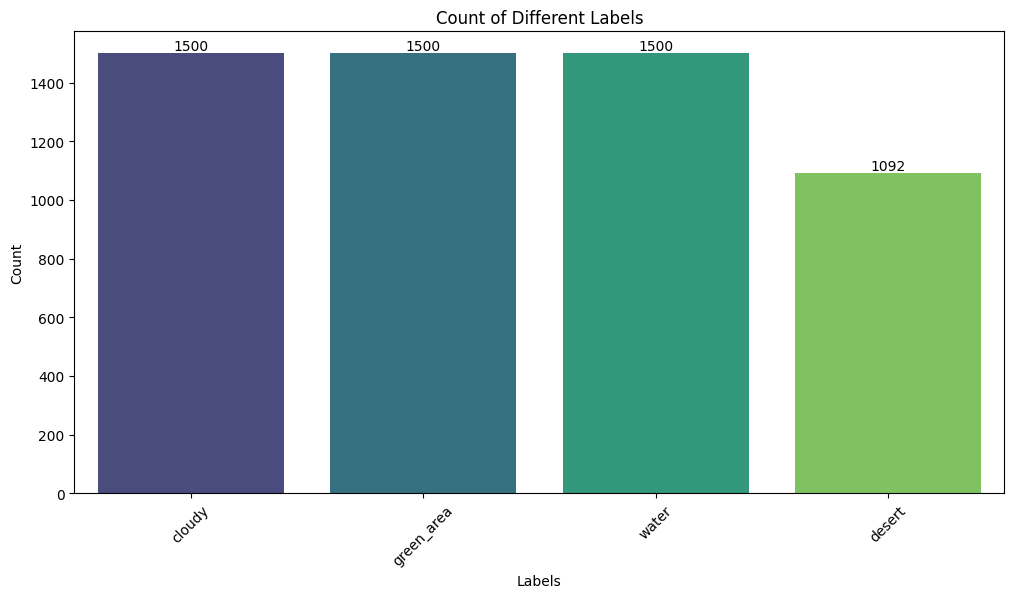

In [7]:
label_column = 'label'

label_counts = df_cleaned[label_column].value_counts()

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Count of Different Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, value in enumerate(label_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


Data Preparation: Computes the count of each label in the cleaned DataFrame.

Plot Creation: Uses Seaborn's barplot to visualize the counts of different labels with a color palette.

Customization: Adds titles, axis labels, and text annotations to improve the plot's readability and informativeness.

Display: Shows the final plot to the user.

In [8]:

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="label",
    target_size=(255, 255),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)


test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="image_path",
    y_col="label",
    target_size=(255, 255),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 4473 validated image filenames belonging to 4 classes.
Found 1119 validated image filenames belonging to 4 classes.


Data Preprocessing: The ImageDataGenerator objects are used to preprocess images for both training and testing. For training, additional data augmentation might be applied to improve model generalization (though not shown here).

Data Generators: The flow_from_dataframe method creates generators that load images and their corresponding labels from a DataFrame, applying specified preprocessing steps and augmentations.

Training and Testing: train_generator handles the training data, including data augmentation and shuffling, while test_generator handles the test data with no augmentation and no shuffling, ensuring consistent evaluation.

Found 1119 validated image filenames belonging to 4 classes.


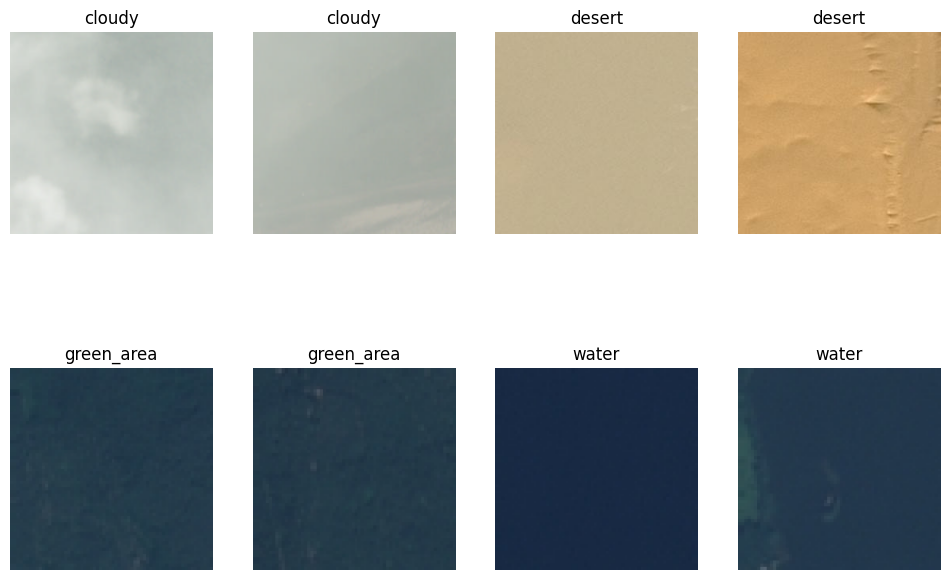

In [9]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="image_path",
    y_col="label",
    target_size=(255, 255),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

def plot_images(images, labels, class_names):
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

num_classes = len(test_generator.class_indices)
images_per_class = 2
sampled_images = []
sampled_labels = []

for class_index in range(num_classes):
    class_df = test_df[test_df['label'] == list(test_generator.class_indices.keys())[class_index]]
    
    class_sample = class_df.sample(images_per_class)
    
    for _, row in class_sample.iterrows():
        img_path = row['image_path']
        img = load_img(img_path, target_size=(255, 255))  
        img_array = img_to_array(img) / 255.0  
        sampled_images.append(img_array)
        label = np.zeros(num_classes)
        label[test_generator.class_indices[row['label']]] = 1
        sampled_labels.append(label)

sampled_images = np.array(sampled_images)
sampled_labels = np.array(sampled_labels)

plot_images(sampled_images, sampled_labels, list(test_generator.class_indices.keys()))


Data Preparation: Uses ImageDataGenerator to preprocess test images.

Plotting Function: Defines a function to display images with their labels.

Sampling: Samples a fixed number of images per class, preprocesses them, and stores them along with their labels.

Visualization: Displays sampled images using Matplotlib, with titles indicating the class labels.

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [17]:
# Set seeds for reproducibility
import tensorflow as tf


np.random.seed(123)
tf.random.set_seed(123)

# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
    #callbacks=[early_stopping]
)

Epoch 1/15


140/140 [==============================] - 255s 2s/step - loss: 20.4247 - accuracy: 0.7789 - val_loss: 43.6731 - val_accuracy: 0.2681
Epoch 2/15
140/140 [==============================] - 262s 2s/step - loss: 18.4595 - accuracy: 0.7501 - val_loss: 25.5933 - val_accuracy: 0.4066
Epoch 3/15
140/140 [==============================] - 266s 2s/step - loss: 10.9925 - accuracy: 0.7427 - val_loss: 6.6321 - val_accuracy: 0.6738
Epoch 4/15
140/140 [==============================] - 354s 3s/step - loss: 5.6637 - accuracy: 0.7422 - val_loss: 6.1379 - val_accuracy: 0.6658
Epoch 5/15
140/140 [==============================] - 393s 3s/step - loss: 6.3741 - accuracy: 0.7018 - val_loss: 18.1108 - val_accuracy: 0.6667
Epoch 6/15
140/140 [==============================] - 356s 3s/step - loss: 3.1069 - accuracy: 0.7682 - val_loss: 1.8860 - val_accuracy: 0.7891
Epoch 7/15
140/140 [==============================] - 278s 2s/step - loss: 1.4591 - accuracy: 0.7831 - val_loss: 0.3950 - val_accuracy

In [18]:
# Evaluate the model
y_true = test_generator.classes
y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)

35/35 [==============================] - 16s 429ms/step


In [19]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')


35/35 [==============================] - 15s 431ms/step - loss: 0.5643 - accuracy: 0.8606
Test Accuracy: 0.8606


In [20]:
cm = confusion_matrix(y_true, y_pred_classes)


In [21]:
cm

array([[277,  20,   2,   1],
       [  2, 217,   0,   0],
       [  0,   0, 187, 113],
       [ 12,   0,   6, 282]], dtype=int64)

In [22]:
history_dict = history.history

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)


history.history: Retrieves the metrics recorded during the training process.

accuracy, val_accuracy, loss, val_loss: Extracts the training and validation metrics for plotting or analysis.

epochs: Generates a sequence of epoch numbers that correspond to the indices of the metric lists.

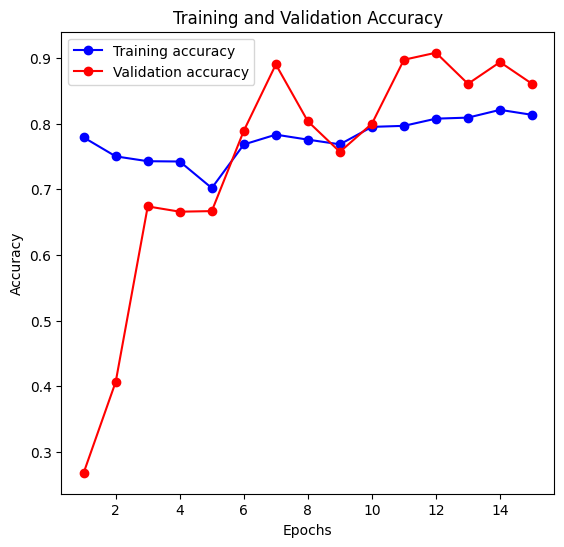

In [23]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

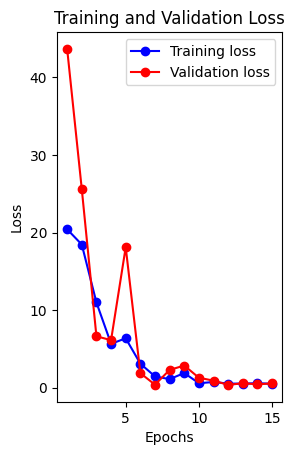

In [38]:
plt.subplot(1, 2,2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
model.save(r'C:\Users\Admin\OneDrive\Desktop\satellite image classification\archive (5)\data/model85.h5')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


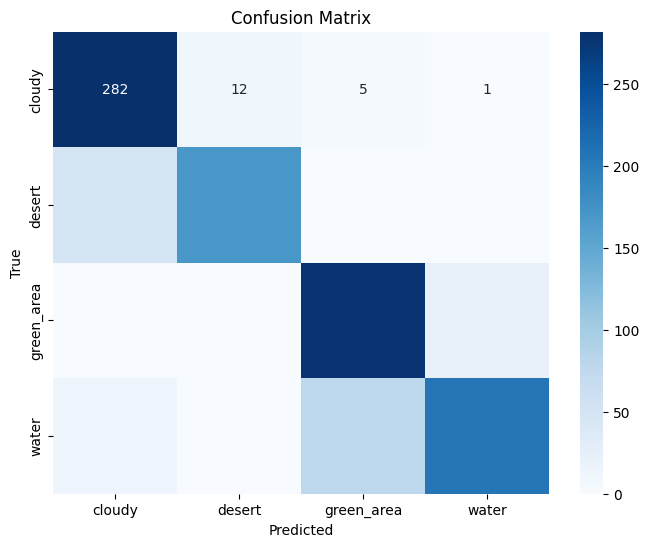

In [16]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Function to preprocess image
def preprocess_image(image_path, target_size=(255, 255)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# Function to predict the class of an image
def predict_image(model, image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

# Example usage for predicting an image
image_path = r'C:\Users\Admin\OneDrive\Desktop\satellite image classification\archive (5)\data\green_area\Forest_5.jpg'
predicted_class = predict_image(model, image_path)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 66ms/step
Predicted class: [3]


In [72]:
pip install gradio

  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached ffmpy-0.3.2-py3-none-any.whl
  Using cached httpx-0.27.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
     ---------------------------------------- 0.0/51.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.6 kB ? eta -:--:--
     -------------------------------------  51.2/51.6 kB 137.9 kB/s eta 0:00:01
     -------------------------------------- 51.6/51.6 kB 126.2 kB/s eta 0:00:00
  Using 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Path to your model
MODEL_PATH = 'model85.h5'

# Class labels
class_labels = {
    0: "cloudy",
    1: "desert",
    2: "green area",
    3: "water"
}

# Function to preprocess image
def preprocess_image(img, target_size=(255, 255)):
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# Function to predict the class of an image
def predict_image(img):
    model = load_model(MODEL_PATH)
    preprocessed_image = preprocess_image(img)
    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    return class_labels.get(predicted_class_index, "Unknown")

# Gradio interface setup
def create_gradio_interface():
    with gr.Blocks() as demo:
        gr.Markdown("### Satellite Image Classification")
        with gr.Row():
            with gr.Column():
                image_input = gr.Image(type="pil", label="Upload Image")
                output = gr.Label(label="Predicted Class")
                submit_button = gr.Button("Predict")
                
                submit_button.click(fn=predict_image, inputs=image_input, outputs=output)

    demo.launch()

if __name__ == "__main__":
    create_gradio_interface()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 132ms/step
